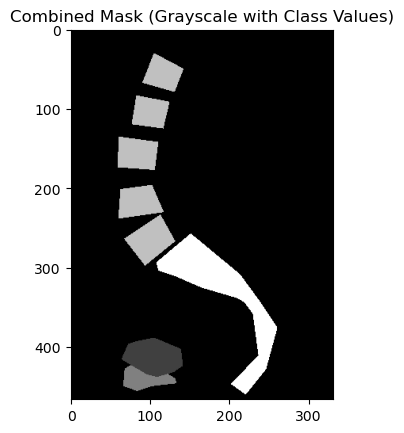

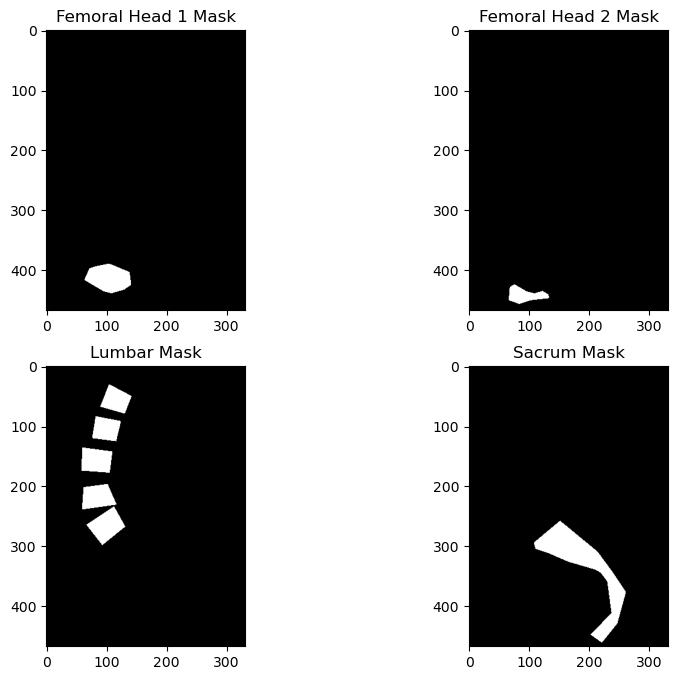

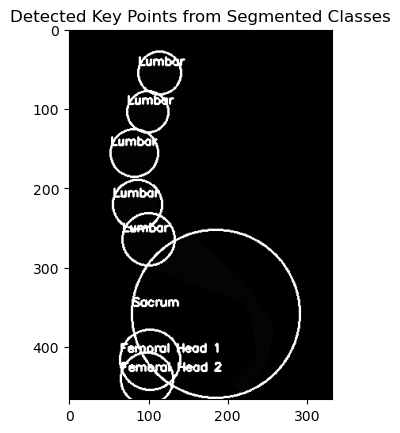

Femoral Head 1 Keypoints: [(102, 417, 38)]
Femoral Head 2 Keypoints: [(98, 441, 33)]
Lumbar Vertebrae Keypoints: [(100, 265, 33), (86, 221, 31), (82, 156, 30), (99, 104, 26), (114, 55, 27)]
Sacral Endplate Keypoints: [(185, 359, 106)]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_class_mask(mask, class_value):
    """
    Extract binary mask for a specific class based on pixel value.
    
    Parameters:
    mask (numpy array): Grayscale mask containing different class values
    class_value (int): Pixel value corresponding to the class
    
    Returns:
    binary_mask (numpy array): Binary mask for the specific class
    """
    binary_mask = np.uint8(mask == class_value) * 255
    return binary_mask

def find_keypoints_from_mask(segmentation_mask):
    """
    This function takes a binary mask and finds the keypoints
    (e.g., sacral endplate or femoral heads) by extracting contours.
    
    Parameters:
    segmentation_mask (numpy array): Binary mask of segmented class
    
    Returns:
    keypoints (list): List of keypoints (center coordinates) extracted from the mask
    """
    # Find contours from the mask
    contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    keypoints = []
    for contour in contours:
        # Find the center and radius of the minimum enclosing circle around the contour
        (x, y), radius = cv2.minEnclosingCircle(contour)
        keypoints.append((int(x), int(y), int(radius)))
    
    return keypoints

def draw_keypoints_on_image(image, keypoints, label="Keypoint"):
    """
    Draw keypoints on the original image.
    
    Parameters:
    image (numpy array): Original image
    keypoints (list): List of keypoints
    label (str): Label for the keypoints
    
    Returns:
    output_image (numpy array): Image with keypoints drawn on it
    """
    output_image = image.copy()
    
    for (x, y, r) in keypoints:
        # Draw circle around the keypoint
        cv2.circle(output_image, (x, y), r, (255, 0, 0), 2)
        cv2.putText(output_image, f"{label}", (x - r, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    return output_image

# Load the combined mask (grayscale with pixel values for each class)
combined_mask = cv2.imread(r"C:\Users\LAXMI\Downloads\cap.v1i.png-mask-semantic1\train\WhatsApp-Image-2024-10-01-at-22_0_3183_jpg.rf.8371d6d3822f233fd656b712a1ea1d4b_mask.png", cv2.IMREAD_GRAYSCALE)

# Visualize the combined mask
plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Mask (Grayscale with Class Values)')
plt.show()

# Extract individual binary masks for each class
femoral_head_1_mask = extract_class_mask(combined_mask, 2)
femoral_head_2_mask = extract_class_mask(combined_mask, 3)
lumbar_mask = extract_class_mask(combined_mask, 4)
sacrum_mask = extract_class_mask(combined_mask, 5)

# Visualize the individual masks
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(femoral_head_1_mask, cmap='gray')
plt.title('Femoral Head 1 Mask')

plt.subplot(2, 2, 2)
plt.imshow(femoral_head_2_mask, cmap='gray')
plt.title('Femoral Head 2 Mask')

plt.subplot(2, 2, 3)
plt.imshow(lumbar_mask, cmap='gray')
plt.title('Lumbar Mask')

plt.subplot(2, 2, 4)
plt.imshow(sacrum_mask, cmap='gray')
plt.title('Sacrum Mask')
plt.show()

# Find keypoints for femoral heads, lumbar vertebrae, and sacrum
femoral_head_1_keypoints = find_keypoints_from_mask(femoral_head_1_mask)
femoral_head_2_keypoints = find_keypoints_from_mask(femoral_head_2_mask)
lumbar_keypoints = find_keypoints_from_mask(lumbar_mask)
sacral_keypoints = find_keypoints_from_mask(sacrum_mask)

original_image = combined_mask.copy()  # Placeholder for original image

# Draw the keypoints on the image
image_with_femoral_head_1 = draw_keypoints_on_image(original_image, femoral_head_1_keypoints, label="Femoral Head 1")
image_with_femoral_head_2 = draw_keypoints_on_image(image_with_femoral_head_1, femoral_head_2_keypoints, label="Femoral Head 2")
image_with_lumbar = draw_keypoints_on_image(image_with_femoral_head_2, lumbar_keypoints, label="Lumbar")
final_image = draw_keypoints_on_image(image_with_lumbar, sacral_keypoints, label="Sacrum")

# Visualize the image with detected keypoints
plt.imshow(final_image, cmap='gray')
plt.title('Detected Key Points from Segmented Classes')
plt.show()

# Print detected keypoints
print(f"Femoral Head 1 Keypoints: {femoral_head_1_keypoints}")
print(f"Femoral Head 2 Keypoints: {femoral_head_2_keypoints}")
print(f"Lumbar Vertebrae Keypoints: {lumbar_keypoints}")
print(f"Sacral Endplate Keypoints: {sacral_keypoints}")



In [2]:
import numpy as np
import math

def calculate_angle_between_vectors(vec1, vec2):
    """Calculate the angle between two vectors in degrees."""
    dot_product = np.dot(vec1, vec2)
    magnitude1 = np.linalg.norm(vec1)
    magnitude2 = np.linalg.norm(vec2)
    angle_radians = math.acos(dot_product / (magnitude1 * magnitude2))
    angle_degrees = math.degrees(angle_radians)
    return angle_degrees

def calculate_slope(point1, point2):
    """Calculate the slope between two points."""
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

def calculate_tangent_line(point1, point2):
    """Calculate the tangent line using the slope of two neighboring points."""
    slope = calculate_slope(point1, point2)
    return slope

# Adjusted Keypoints for femoral heads and sacral endplate
femoral_head_1 = (280, 602)  # Femoral Head 1 Keypoint
femoral_head_2 = (339, 630)  # Femoral Head 2 Keypoint

# Sacral endplate keypoints
sacral_endplate_keypoints = [(431, 526), (350, 500)]  # Adjusted sacral endplate points

# Calculate the center of femoral heads by averaging their coordinates
femoral_center = np.mean([femoral_head_1, femoral_head_2], axis=0)
print(f"Femoral Center: {femoral_center}")

# Calculate the sacral center from sacral endplate keypoints
sacral_center = np.mean(sacral_endplate_keypoints, axis=0)
print(f"Sacral Center: {sacral_center}")

# Pelvic Tilt Calculation
pelvic_vector = femoral_center - sacral_center
vertical_vector = np.array([0, 1])  # Vertical axis (y-axis)
pelvic_tilt = calculate_angle_between_vectors(pelvic_vector, vertical_vector)
print(f"Pelvic Incidence: {pelvic_tilt:.2f} degrees")

# Pelvic Incidence Calculation
# Sacral endplate tangent line based on nearby points
sacral_slope = calculate_tangent_line(sacral_endplate_keypoints[0], sacral_endplate_keypoints[1])
sacral_vector = np.array([1, sacral_slope])  # Vector along the sacral endplate
sacral_perpendicular = np.array([-sacral_vector[1], sacral_vector[0]])  # Perpendicular to sacral endplate

# Pelvic Incidence
pelvic_incidence = calculate_angle_between_vectors(sacral_perpendicular, pelvic_vector)
print(f"Pelvic Tilt: {pelvic_incidence:.2f} degrees")

# Sacral Slope Calculation

horizontal_vector = np.array([1, 0])  
sacral_slope_angle = calculate_angle_between_vectors(sacral_vector, horizontal_vector)
print(f"Sacral Slope: {sacral_slope_angle:.2f} degrees")


Femoral Center: [309.5 616. ]
Sacral Center: [390.5 513. ]
Pelvic Incidence: 38.18 degrees
Pelvic Tilt: 20.39 degrees
Sacral Slope: 17.80 degrees


In [3]:
import cv2
import os
import numpy as np
import csv

def extract_class_mask(mask, class_value):
    """
    Extract binary mask for a specific class based on pixel value.
    
    Parameters:
    mask (numpy array): Grayscale mask containing different class values
    class_value (int): Pixel value corresponding to the class
    
    Returns:
    binary_mask (numpy array): Binary mask for the specific class
    """
    binary_mask = np.uint8(mask == class_value) * 255
    return binary_mask

def find_keypoints_from_mask(segmentation_mask):
    """
    This function takes a binary mask and finds the keypoints
    (e.g., sacral endplate or femoral heads) by extracting contours.
    
    Parameters:
    segmentation_mask (numpy array): Binary mask of segmented class
    
    Returns:
    keypoints (list): List of keypoints (center coordinates) extracted from the mask
    """
    # Find contours from the mask
    contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    keypoints = []
    for contour in contours:
        # Find the center and radius of the minimum enclosing circle around the contour
        (x, y), radius = cv2.minEnclosingCircle(contour)
        keypoints.append((int(x), int(y), int(radius)))
    
    return keypoints

def process_dataset(folder_path, output_csv_path):
    """
    Process the dataset to extract landmarks from mask images and store them in a CSV file.
    
    Parameters:
    folder_path (str): Path to the folder containing the original images and mask images
    output_csv_path (str): Path to the output CSV file where landmarks will be stored
    """
    # Prepare the CSV file for writing
    with open(output_csv_path, mode='w', newline='') as csv_file:
        fieldnames = ['Image Name', 'Femoral Head 1 (x,y)', 'Femoral Head 2 (x,y)', 'Lumbar Vertebrae (x,y)', 'Sacrum (x,y)']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        
        # Iterate through the folder to process each image and its corresponding mask
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".jpg"):  # Only process jpg files (original images)
                image_name = file_name
                mask_name = file_name.replace(".jpg", "_mask.png")  # Find the corresponding mask image
                
                # Load the mask image (grayscale)
                mask_path = os.path.join(folder_path, mask_name)
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                
                if mask is None:
                    print(f"Mask not found for {image_name}")
                    continue
                
                # Extract binary masks for each class
                femoral_head_1_mask = extract_class_mask(mask, 2)
                femoral_head_2_mask = extract_class_mask(mask, 3)
                lumbar_mask = extract_class_mask(mask, 4)
                sacrum_mask = extract_class_mask(mask, 5)

                # Find keypoints for femoral heads, lumbar vertebrae, and sacrum
                femoral_head_1_keypoints = find_keypoints_from_mask(femoral_head_1_mask)
                femoral_head_2_keypoints = find_keypoints_from_mask(femoral_head_2_mask)
                lumbar_keypoints = find_keypoints_from_mask(lumbar_mask)
                sacral_keypoints = find_keypoints_from_mask(sacrum_mask)

                # Prepare row data for CSV (handling multiple points by selecting the first detected)
                row = {
                    'Image Name': image_name,
                    'Femoral Head 1 (x,y)': f"{femoral_head_1_keypoints[0][:2]}" if femoral_head_1_keypoints else "Not Found",
                    'Femoral Head 2 (x,y)': f"{femoral_head_2_keypoints[0][:2]}" if femoral_head_2_keypoints else "Not Found",
                    'Lumbar Vertebrae (x,y)': f"{lumbar_keypoints[0][:2]}" if lumbar_keypoints else "Not Found",
                    'Sacrum (x,y)': f"{sacral_keypoints[0][:2]}" if sacral_keypoints else "Not Found"
                }

                # Write the row to the CSV
                writer.writerow(row)
                print(f"Processed {image_name}")

# Example usage:
folder_path = r"C:\Users\LAXMI\Downloads\cap.v1i.png-mask-semantic1\train"  # Folder containing both images and masks
output_csv_path = 'landmarks_output.csv'  # Output CSV file path

# Process the dataset and store landmarks in a CSV file
process_dataset(folder_path, output_csv_path)


Processed 10_jpg.rf.6afe41ef74dad6a156782a19d8d5156f.jpg
Processed 12_jpg.rf.712e0c5fe707a8bd9720ec0d343ee175.jpg
Processed 13_jpg.rf.1317e78d6af6b749db14c362543a9b97.jpg
Processed 1_jpg.rf.052ce1dbdfccfce5ca9205f3975d67e2.jpg
Processed 2_jpg.rf.01f536f26a2a66d95ba0cca6a348d805.jpg
Processed 3_jpg.rf.c36613f01abe95bb55cd58a63da0a2e5.jpg
Processed 4_jpg.rf.e6006b9ae2c0975f501ab84e41937761.jpg
Processed 6_jpg.rf.099b3b325c481dfbeed72f59bb609f2a.jpg
Processed 7_jpg.rf.a913685409fae57e84c237853e61ff9a.jpg
Processed 9_jpg.rf.5e2c43b5356b6622f4b27130b1ae356a.jpg
Processed spine-images_original_1-jpg_41dac58d-7ed6-4828-bd9b-e11fee1ac472_jpg.rf.3164b1b797d45325d16f6370cf9dd759.jpg
Processed spine-images_original_1-jpg_b3ea6fef-52ff-46ea-a24c-5e2f81c8aa0e_jpg.rf.94f880e4d9cc9843c26a628113b58104.jpg
Processed spine-images_original_1-jpg_dc534920-f2c5-42bf-b110-ce94667936ba_jpg.rf.bc675f5f69178394a1ebca6c896bebe1.jpg
Processed spine-images_original_10-jpg_00de3015-d373-47ae-9350-0cc2e815452b_jpg.

In [9]:
import csv
import math
import numpy as np
import pandas as pd

def calculate_angle_between_vectors(vec1, vec2):
    """Calculate the angle between two vectors in degrees."""
    dot_product = np.dot(vec1, vec2)
    magnitude1 = np.linalg.norm(vec1)
    magnitude2 = np.linalg.norm(vec2)
    angle_radians = math.acos(dot_product / (magnitude1 * magnitude2))
    angle_degrees = math.degrees(angle_radians)
    return angle_degrees

def calculate_slope(point1, point2):
    """Calculate the slope between two points."""
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

def calculate_tangent_line(point1, point2):
    """Calculate the tangent line using the slope of two neighboring points."""
    slope = calculate_slope(point1, point2)
    return slope

def process_landmarks_and_calculate_angles(input_csv_path, output_csv_path):
    """
    Load landmarks from CSV, calculate PI, PT, SS angles, and save to a new CSV file.
    
    Parameters:
    input_csv_path (str): Path to the input CSV file with landmarks
    output_csv_path (str): Path to the output CSV file with calculated angles
    """
    # Read the input CSV file into a pandas DataFrame
    df = pd.read_csv(input_csv_path)

    # Prepare lists to store the calculated angles
    pi_list = []
    pt_list = []
    ss_list = []

    for index, row in df.iterrows():
        try:
            # Extract the landmarks from the CSV row, with validation
            femoral_head_1 = eval(row['Femoral Head 1 (x,y)']) if 'Femoral Head 1 (x,y)' in row and row['Femoral Head 1 (x,y)'] != "Not Found" else None
            femoral_head_2 = eval(row['Femoral Head 2 (x,y)']) if 'Femoral Head 2 (x,y)' in row and row['Femoral Head 2 (x,y)'] != "Not Found" else None
            lumbar_vertebrae = eval(row['Lumbar Vertebrae (x,y)']) if 'Lumbar Vertebrae (x,y)' in row and row['Lumbar Vertebrae (x,y)'] != "Not Found" else None
            sacral_endplate = eval(row['Sacrum (x,y)']) if 'Sacrum (x,y)' in row and row['Sacrum (x,y)'] != "Not Found" else None

            # Check that all required landmarks are available
            if None in [femoral_head_1, femoral_head_2, sacral_endplate, lumbar_vertebrae]:
                print(f"Skipping row {index + 1} due to missing landmarks.")
                pi_list.append(None)
                pt_list.append(None)
                ss_list.append(None)
                continue

            # Calculate the center of the femoral heads (midpoint)
            femoral_center = np.mean([femoral_head_1, femoral_head_2], axis=0)
            
            # Pelvic Tilt (PT) calculation
            pelvic_vector = femoral_center - sacral_endplate
            vertical_vector = np.array([0, 1])  # Vertical axis (y-axis)
            pt_angle = calculate_angle_between_vectors(pelvic_vector, vertical_vector)
            pt_list.append(pt_angle)
            
            # Pelvic Incidence (PI) calculation
            sacral_endplate_point1 = sacral_endplate
            sacral_endplate_point2 = lumbar_vertebrae
            sacral_slope = calculate_tangent_line(sacral_endplate_point1, sacral_endplate_point2)
            sacral_vector = np.array([1, sacral_slope])
            sacral_perpendicular = np.array([-sacral_vector[1], sacral_vector[0]])
            pi_angle = calculate_angle_between_vectors(sacral_perpendicular, pelvic_vector)
            pi_list.append(pi_angle)
            
            # Sacral Slope (SS) calculation
            horizontal_vector = np.array([1, 0])  # Horizontal axis (x-axis)
            ss_angle = calculate_angle_between_vectors(sacral_vector, horizontal_vector)
            ss_list.append(ss_angle)

        except (SyntaxError, ValueError, TypeError) as e:
            print(f"Error processing row {index + 1}: {e}")
            pi_list.append(None)
            pt_list.append(None)
            ss_list.append(None)

    # Create a new DataFrame for the calculated angles
    output_df = pd.DataFrame({
        'Image Name': df['Image Name'],
        'Pelvic Incidence (PI)': pi_list,
        'Pelvic Tilt (PT)': pt_list,
        'Sacral Slope (SS)': ss_list
    })

    # Save the output DataFrame to a new CSV file
    output_df.to_csv(output_csv_path, index=False)
    print(f"Angles saved to {output_csv_path}")

# Example usage:
input_csv_path = r"C:\Users\LAXMI\Downloads\landmarks_output.csv"  # Input CSV file with landmarks
output_csv_path = 'calculated_angles_output.csv'  # Output CSV file with calculated angles

# Process the landmarks and calculate the angles
process_landmarks_and_calculate_angles(input_csv_path, output_csv_path)


Skipping row 137 due to missing landmarks.
Angles saved to calculated_angles_output.csv


Femoral Head 1 Keypoint: (139, 375)
Femoral Head 2 Keypoint: (120, 405)
Lumbar Vertebrae Keypoint: (142, 216)
Sacral Endplate Keypoint: (229, 304)


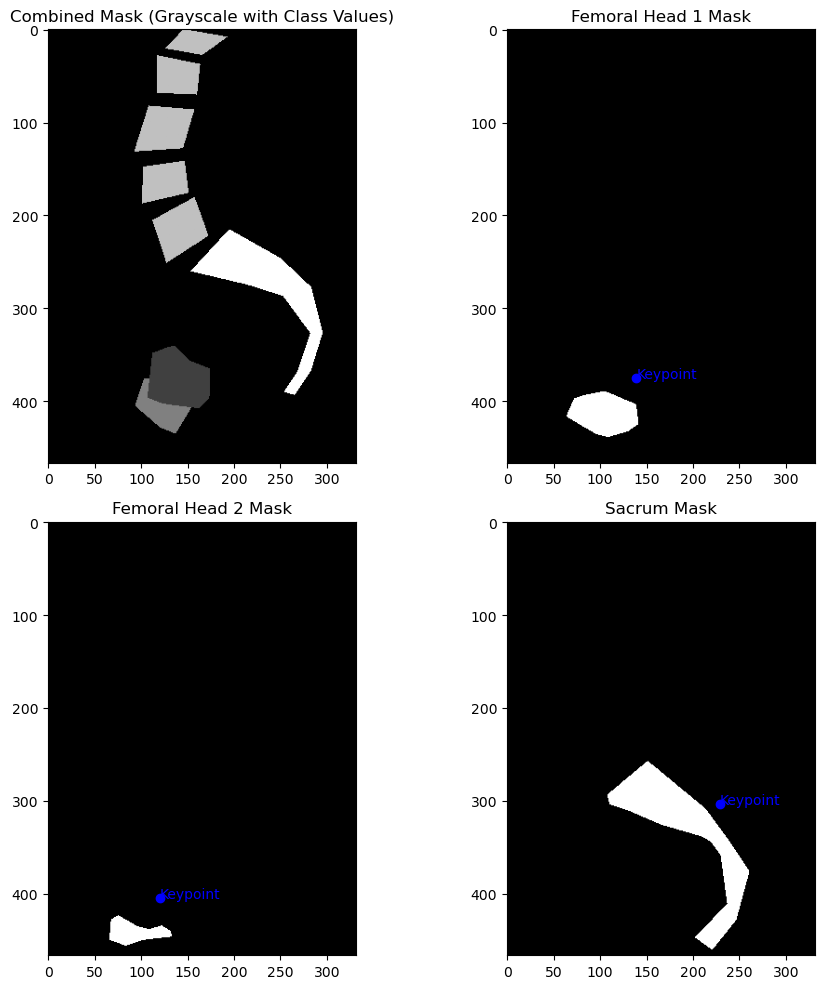

Pelvic Incidence (PI): 3.84 degrees
Pelvic Tilt (PT): 49.16 degrees
Sacral Slope (SS): 45.33 degrees


In [10]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def extract_class_mask(mask, class_value):
    """Extract binary mask for a specific class based on pixel value."""
    binary_mask = np.uint8(mask == class_value) * 255
    return binary_mask

def find_keypoints_from_mask(segmentation_mask):
    """This function takes a binary mask and finds the keypoints by extracting contours."""
    contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    keypoints = []
    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        keypoints.append((int(x), int(y), int(radius)))
    return keypoints

def calculate_angle_between_vectors(vec1, vec2):
    """Calculate the angle between two vectors in degrees."""
    dot_product = np.dot(vec1, vec2)
    magnitude1 = np.linalg.norm(vec1)
    magnitude2 = np.linalg.norm(vec2)
    angle_radians = math.acos(dot_product / (magnitude1 * magnitude2))
    angle_degrees = math.degrees(angle_radians)
    return angle_degrees

def calculate_slope(point1, point2):
    """Calculate the slope between two points."""
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

def calculate_tangent_line(point1, point2):
    """Calculate the tangent line using the slope of two neighboring points."""
    slope = calculate_slope(point1, point2)
    return slope

def plot_mask_and_keypoints(mask, femoral_head_1_keypoints, femoral_head_2_keypoints, lumbar_keypoints, sacral_keypoints):
    """Plot the mask and overlay the detected keypoints."""
    
    # Show combined mask
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(mask, cmap='gray')
    plt.title('Combined Mask (Grayscale with Class Values)')
    
    # Plot the individual keypoints
    def plot_keypoints(mask, keypoints, title):
        plt.imshow(mask, cmap='gray')
        for (x, y, r) in keypoints:
            plt.scatter(x, y, color='blue')
            plt.text(x, y, "Keypoint", color='blue')
        plt.title(title)

    plt.subplot(2, 2, 2)
    plot_keypoints(femoral_head_1_mask, femoral_head_1_keypoints, 'Femoral Head 1 Mask')
    
    plt.subplot(2, 2, 3)
    plot_keypoints(femoral_head_2_mask, femoral_head_2_keypoints, 'Femoral Head 2 Mask')
    
    plt.subplot(2, 2, 4)
    plot_keypoints(sacrum_mask, sacral_keypoints, 'Sacrum Mask')
    
    plt.tight_layout()
    plt.show()

def predict_angles_from_image_and_mask(image_path, mask_path):
    """Predict PI, PT, SS angles for a user input image and its corresponding mask."""
    
    # Load the mask image (grayscale)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if mask is None:
        print(f"Mask not found at {mask_path}")
        return
    
    # Extract binary masks for each class (based on predefined pixel values)
    femoral_head_1_mask = extract_class_mask(mask, 2)
    femoral_head_2_mask = extract_class_mask(mask, 3)
    lumbar_mask = extract_class_mask(mask, 4)
    sacrum_mask = extract_class_mask(mask, 5)

    # Find keypoints for femoral heads, lumbar vertebrae, and sacrum
    femoral_head_1_keypoints = find_keypoints_from_mask(femoral_head_1_mask)
    femoral_head_2_keypoints = find_keypoints_from_mask(femoral_head_2_mask)
    lumbar_keypoints = find_keypoints_from_mask(lumbar_mask)
    sacral_keypoints = find_keypoints_from_mask(sacrum_mask)
    
    if not femoral_head_1_keypoints or not femoral_head_2_keypoints or not sacral_keypoints:
        print("Required keypoints not found in the mask.")
        return

    # Select the first keypoint detected for each class
    femoral_head_1 = femoral_head_1_keypoints[0][:2]
    femoral_head_2 = femoral_head_2_keypoints[0][:2]
    lumbar_vertebrae = lumbar_keypoints[0][:2] if lumbar_keypoints else None
    sacral_endplate = sacral_keypoints[0][:2]

    # Print the detected landmarks
    print(f"Femoral Head 1 Keypoint: {femoral_head_1}")
    print(f"Femoral Head 2 Keypoint: {femoral_head_2}")
    print(f"Lumbar Vertebrae Keypoint: {lumbar_vertebrae}")
    print(f"Sacral Endplate Keypoint: {sacral_endplate}")

    # Calculate the center of the femoral heads (midpoint)
    femoral_center = np.mean([femoral_head_1, femoral_head_2], axis=0)
    
    # Pelvic Tilt (PT) calculation:
    pelvic_vector = femoral_center - sacral_endplate
    vertical_vector = np.array([0, 1])  # Vertical axis (y-axis)
    pt_angle = calculate_angle_between_vectors(pelvic_vector, vertical_vector)
    
    # Pelvic Incidence (PI) calculation:
    sacral_endplate_point1 = sacral_endplate
    sacral_endplate_point2 = lumbar_vertebrae if lumbar_vertebrae is not None else femoral_head_1
    sacral_slope = calculate_tangent_line(sacral_endplate_point1, sacral_endplate_point2)
    sacral_vector = np.array([1, sacral_slope])  # Vector along sacral endplate
    sacral_perpendicular = np.array([-sacral_vector[1], sacral_vector[0]])  # Perpendicular to sacral endplate
    pi_angle = calculate_angle_between_vectors(sacral_perpendicular, pelvic_vector)
    
    # Sacral Slope (SS) calculation:
    horizontal_vector = np.array([1, 0])  # Horizontal axis (x-axis)
    ss_angle = calculate_angle_between_vectors(sacral_vector, horizontal_vector)

    # Plot the mask and the detected keypoints
    plot_mask_and_keypoints(mask, femoral_head_1_keypoints, femoral_head_2_keypoints, lumbar_keypoints, sacral_keypoints)

    # Return the calculated angles
    return {
        'Pelvic Incidence (PI)': pi_angle,
        'Pelvic Tilt (PT)': pt_angle,
        'Sacral Slope (SS)': ss_angle
    }

# Example usage:
image_path = r"C:\Users\LAXMI\Downloads\cap.v1i.png-mask-semantic1\train\WhatsApp-Image-2024-10-01-at-22_0_175_jpg.rf.4dbabaec5ca5ee23d2d08af31e3dc1e2.jpg"
mask_path = r"C:\Users\LAXMI\Downloads\cap.v1i.png-mask-semantic1\train\WhatsApp-Image-2024-10-01-at-22_0_175_jpg.rf.4dbabaec5ca5ee23d2d08af31e3dc1e2_mask.png"
# Predict the angles for the user input image
angles = predict_angles_from_image_and_mask(image_path, mask_path)

if angles:
    print(f"Pelvic Incidence (PI): {angles['Pelvic Incidence (PI)']:.2f} degrees")
    print(f"Pelvic Tilt (PT): {angles['Pelvic Tilt (PT)']:.2f} degrees")
    print(f"Sacral Slope (SS): {angles['Sacral Slope (SS)']:.2f} degrees")


In [11]:
import pandas as pd


file_path = r"C:\Users\LAXMI\Downloads\calculated_angles_output.csv"  # Replace with your file path
df = pd.read_csv(file_path)


PI_threshold = (35, 85)  
PT_threshold = (4.9, 13)  
SS_threshold = (35, 45)   

# Function to predict back pain based on thresholds
def predict_back_pain(pi, pt, ss):

    if not (PI_threshold[0] <= pi <= PI_threshold[1]):
        return 1  
    if not (PT_threshold[0] <= pt <= PT_threshold[1]):
        return 1  
    if not (SS_threshold[0] <= ss <= SS_threshold[1]):
        return 1  
    return 0  

# Apply the prediction function to each row in the dataframe
df['Back Pain Prediction'] = df.apply(lambda row: predict_back_pain(row['Pelvic Incidence (PI)'], 
                                                                    row['Pelvic Tilt (PT)'], 
                                                                    row['Sacral Slope (SS)']), axis=1)

# Save the predictions to a new CSV file
output_file_path = 'back_pain_predictions.csv' 
df.to_csv(output_file_path, index=False)

print(f"Predictions saved to {output_file_path}")


Predictions saved to back_pain_predictions.csv


Femoral Head 1 Keypoint: (139, 375)
Femoral Head 2 Keypoint: (120, 405)
Lumbar Vertebrae Keypoint: (142, 216)
Sacral Endplate Keypoint: (229, 304)


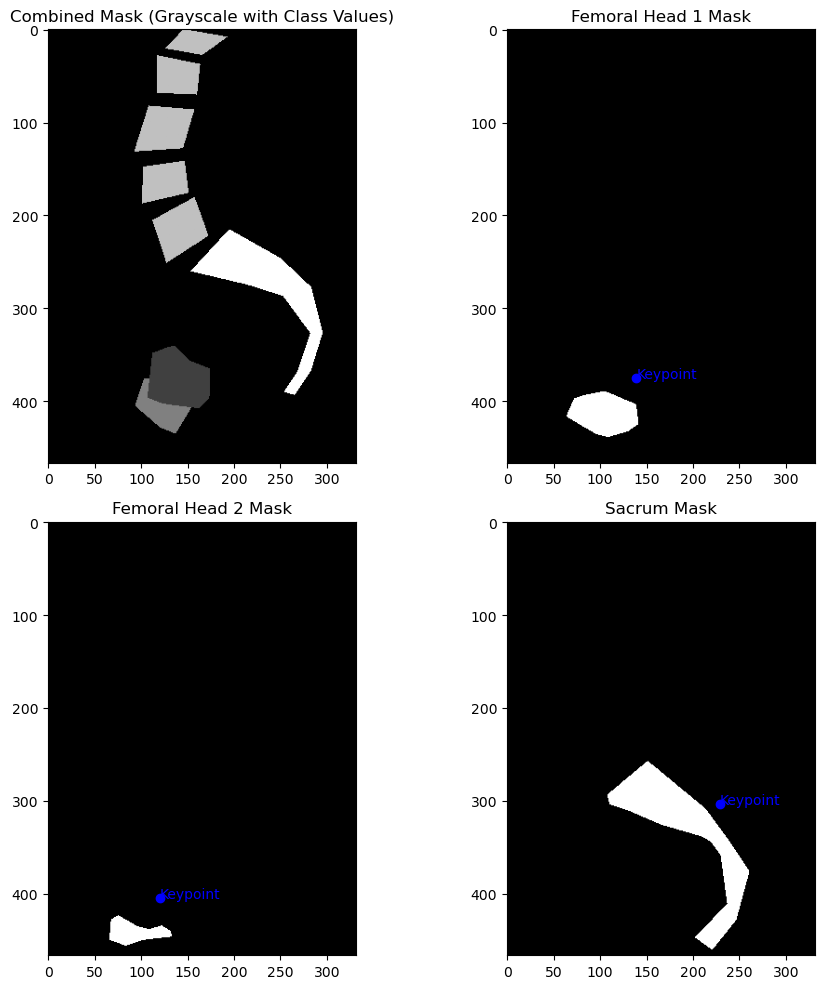

Pelvic Incidence (PI): 3.84 degrees
Pelvic Tilt (PT): 49.16 degrees
Sacral Slope (SS): 45.33 degrees
Pelvic Incidence (PI) is too low: 3.84 degrees. Normal range is 4.9-13 degrees.
Sacral Slope (SS) is too high: 45.33 degrees. Normal range is 35-45 degrees.
Back Pain Prediction: Likely Back Pain


In [12]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def extract_class_mask(mask, class_value):
    """Extract binary mask for a specific class based on pixel value."""
    binary_mask = np.uint8(mask == class_value) * 255
    return binary_mask

def find_keypoints_from_mask(segmentation_mask):
    """This function takes a binary mask and finds the keypoints by extracting contours."""
    contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    keypoints = []
    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        keypoints.append((int(x), int(y), int(radius)))
    return keypoints

def calculate_angle_between_vectors(vec1, vec2):
    """Calculate the angle between two vectors in degrees."""
    dot_product = np.dot(vec1, vec2)
    magnitude1 = np.linalg.norm(vec1)
    magnitude2 = np.linalg.norm(vec2)
    angle_radians = math.acos(dot_product / (magnitude1 * magnitude2))
    angle_degrees = math.degrees(angle_radians)
    return angle_degrees

def calculate_slope(point1, point2):
    """Calculate the slope between two points."""
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

def calculate_tangent_line(point1, point2):
    """Calculate the tangent line using the slope of two neighboring points."""
    slope = calculate_slope(point1, point2)
    return slope

def plot_mask_and_keypoints(mask, femoral_head_1_keypoints, femoral_head_2_keypoints, lumbar_keypoints, sacral_keypoints):
    """Plot the mask and overlay the detected keypoints."""
    
    # Show combined mask
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(mask, cmap='gray')
    plt.title('Combined Mask (Grayscale with Class Values)')
    
    # Plot the individual keypoints
    def plot_keypoints(mask, keypoints, title):
        plt.imshow(mask, cmap='gray')
        for (x, y, r) in keypoints:
            plt.scatter(x, y, color='blue')
            plt.text(x, y, "Keypoint", color='blue')
        plt.title(title)

    plt.subplot(2, 2, 2)
    plot_keypoints(femoral_head_1_mask, femoral_head_1_keypoints, 'Femoral Head 1 Mask')
    
    plt.subplot(2, 2, 3)
    plot_keypoints(femoral_head_2_mask, femoral_head_2_keypoints, 'Femoral Head 2 Mask')
    
    plt.subplot(2, 2, 4)
    plot_keypoints(sacrum_mask, sacral_keypoints, 'Sacrum Mask')
    
    plt.tight_layout()
    plt.show()

def predict_back_pain(pi, pt, ss):
    """
    Predict back pain based on Pelvic Incidence (PI), Pelvic Tilt (PT), and Sacral Slope (SS).
    
    Arguments:
    pi -- Pelvic Incidence (float)
    pt -- Pelvic Tilt (float)
    ss -- Sacral Slope (float)
    
    Returns:
    str -- Prediction result ("Likely Back Pain" or "No Back Pain")
    """
    
    PT_threshold = (35, 85)  
    PI_threshold = (4.9, 13)  
    SS_threshold = (35, 45) 

    likely_back_pain = False
    
    if pi < PI_threshold[0]:
        print(f"Pelvic Incidence (PI) is too low: {pi:.2f} degrees. Normal range is {PI_threshold[0]}-{PI_threshold[1]} degrees.")
        likely_back_pain = True
    elif pi > PI_threshold[1]:
        print(f"Pelvic Incidence (PI) is too high: {pi:.2f} degrees. Normal range is {PI_threshold[0]}-{PI_threshold[1]} degrees.")
        likely_back_pain = True
  
    if pt < PT_threshold[0]:
        print(f"Pelvic Tilt (PT) is too low: {pt:.2f} degrees. Normal range is {PT_threshold[0]}-{PT_threshold[1]} degrees.")
        likely_back_pain = True
    elif pt > PT_threshold[1]:
        print(f"Pelvic Tilt (PT) is too high: {pt:.2f} degrees. Normal range is {PT_threshold[0]}-{PT_threshold[1]} degrees.")
        likely_back_pain = True
    
    if ss < SS_threshold[0]:
        print(f"Sacral Slope (SS) is too low: {ss:.2f} degrees. Normal range is {SS_threshold[0]}-{SS_threshold[1]} degrees.")
        likely_back_pain = True
    elif ss > SS_threshold[1]:
        print(f"Sacral Slope (SS) is too high: {ss:.2f} degrees. Normal range is {SS_threshold[0]}-{SS_threshold[1]} degrees.")
        likely_back_pain = True
    
    if likely_back_pain:
        return "Likely Back Pain"
    else:
        return "No Back Pain"


def predict_angles_from_image_and_mask(image_path, mask_path):
    """Predict PI, PT, SS angles for a user input image and its corresponding mask."""
    
    # Load the mask image (grayscale)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if mask is None:
        print(f"Mask not found at {mask_path}")
        return
    
    femoral_head_1_mask = extract_class_mask(mask, 2)
    femoral_head_2_mask = extract_class_mask(mask, 3)
    lumbar_mask = extract_class_mask(mask, 4)
    sacrum_mask = extract_class_mask(mask, 5)

    femoral_head_1_keypoints = find_keypoints_from_mask(femoral_head_1_mask)
    femoral_head_2_keypoints = find_keypoints_from_mask(femoral_head_2_mask)
    lumbar_keypoints = find_keypoints_from_mask(lumbar_mask)
    sacral_keypoints = find_keypoints_from_mask(sacrum_mask)
    
    if not femoral_head_1_keypoints or not femoral_head_2_keypoints or not sacral_keypoints:
        print("Required keypoints not found in the mask.")
        return

    femoral_head_1 = femoral_head_1_keypoints[0][:2]
    femoral_head_2 = femoral_head_2_keypoints[0][:2]
    lumbar_vertebrae = lumbar_keypoints[0][:2] if lumbar_keypoints else None
    sacral_endplate = sacral_keypoints[0][:2]

    print(f"Femoral Head 1 Keypoint: {femoral_head_1}")
    print(f"Femoral Head 2 Keypoint: {femoral_head_2}")
    print(f"Lumbar Vertebrae Keypoint: {lumbar_vertebrae}")
    print(f"Sacral Endplate Keypoint: {sacral_endplate}")

    femoral_center = np.mean([femoral_head_1, femoral_head_2], axis=0)
    
    # Pelvic Tilt (PT) calculation:
    pelvic_vector = femoral_center - sacral_endplate
    vertical_vector = np.array([0, 1])  # Vertical axis (y-axis)
    pt_angle = calculate_angle_between_vectors(pelvic_vector, vertical_vector)
    
    # Pelvic Incidence (PI) calculation:
    sacral_endplate_point1 = sacral_endplate
    sacral_endplate_point2 = lumbar_vertebrae if lumbar_vertebrae is not None else femoral_head_1
    sacral_slope = calculate_tangent_line(sacral_endplate_point1, sacral_endplate_point2)
    sacral_vector = np.array([1, sacral_slope])  # Vector along sacral endplate
    sacral_perpendicular = np.array([-sacral_vector[1], sacral_vector[0]])  # Perpendicular to sacral endplate
    pi_angle = calculate_angle_between_vectors(sacral_perpendicular, pelvic_vector)
    
    # Sacral Slope (SS) calculation:
    horizontal_vector = np.array([1, 0])  # Horizontal axis (x-axis)
    ss_angle = calculate_angle_between_vectors(sacral_vector, horizontal_vector)

    # Plot the mask and the detected keypoints
    plot_mask_and_keypoints(mask, femoral_head_1_keypoints, femoral_head_2_keypoints, lumbar_keypoints, sacral_keypoints)

    return {
        'Pelvic Incidence (PI)': pi_angle,
        'Pelvic Tilt (PT)': pt_angle,
        'Sacral Slope (SS)': ss_angle
    }

# Example usage:
image_path = r"C:\Users\LAXMI\Downloads\cap.v1i.png-mask-semantic1\train\WhatsApp-Image-2024-10-01-at-22_0_175_jpg.rf.4dbabaec5ca5ee23d2d08af31e3dc1e2.jpg"
mask_path = r"C:\Users\LAXMI\Downloads\cap.v1i.png-mask-semantic1\train\WhatsApp-Image-2024-10-01-at-22_0_175_jpg.rf.4dbabaec5ca5ee23d2d08af31e3dc1e2_mask.png"

# Predict the angles for the user input image
angles = predict_angles_from_image_and_mask(image_path, mask_path)

if angles:
    print(f"Pelvic Incidence (PI): {angles['Pelvic Incidence (PI)']:.2f} degrees")
    print(f"Pelvic Tilt (PT): {angles['Pelvic Tilt (PT)']:.2f} degrees")
    print(f"Sacral Slope (SS): {angles['Sacral Slope (SS)']:.2f} degrees")

    # Predict if the user has back pain based on the calculated angles
    back_pain_prediction = predict_back_pain(angles['Pelvic Incidence (PI)'], angles['Pelvic Tilt (PT)'], angles['Sacral Slope (SS)'])
    print(f"Back Pain Prediction: {back_pain_prediction}")


Femoral Head 1 Keypoint: (132, 395)
Femoral Head 2 Keypoint: (112, 432)
Lumbar Vertebrae Keypoint: (135, 230)
Sacral Endplate Keypoint: (224, 319)


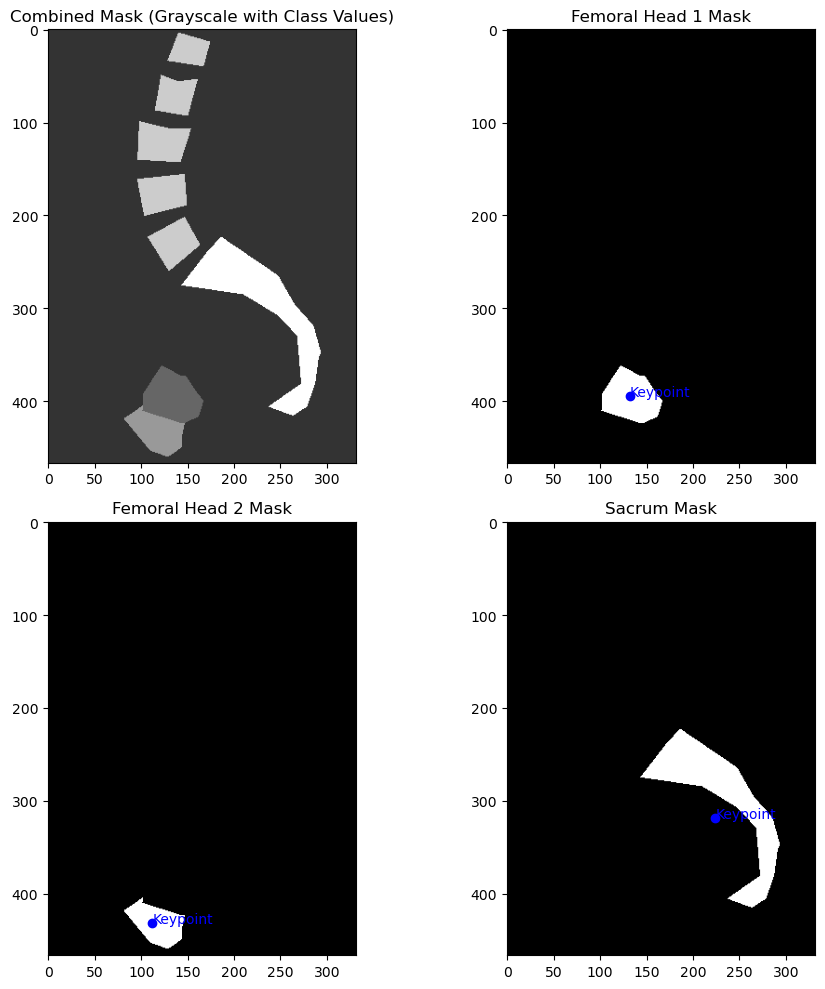

Pelvic Tilt (PT): 47.19 degrees
Pelvic Incidence (PI): 2.19 degrees
Sacral Slope (SS): 45.00 degrees
Pelvic Incidence (PI): 2.19 degrees
Pelvic Tilt (PT): 47.19 degrees
Sacral Slope (SS): 45.00 degrees
Pelvic Incidence (PI) is too low: 2.19 degrees. Normal range is 4.9-13 degrees.
Sacral Slope (SS) is too high: 45.00 degrees. Normal range is 35-45 degrees.
Back Pain Prediction: Likely Back Pain
Precautions to manage or reduce back pain:
- Maintain good posture, especially when sitting.
- Use ergonomic chairs or supportive cushions.
- Avoid lifting heavy objects incorrectly; lift with your legs, not your back.
- Incorporate regular, gentle exercise like walking or yoga.
- Stretch daily to improve flexibility and strengthen core muscles.
- Consider consulting a physical therapist for targeted exercises.
Back Pain Prediction: Likely Back Pain


In [5]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def extract_class_mask(mask, class_value):
    """Extract binary mask for a specific class based on pixel value."""
    binary_mask = np.uint8(mask == class_value) * 255
    return binary_mask

def find_keypoints_from_mask(segmentation_mask):
    """This function takes a binary mask and finds the keypoints by extracting contours."""
    contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    keypoints = []
    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        keypoints.append((int(x), int(y), int(radius)))
    return keypoints

def calculate_angle_between_vectors(vec1, vec2):
    """Calculate the angle between two vectors in degrees."""
    dot_product = np.dot(vec1, vec2)
    magnitude1 = np.linalg.norm(vec1)
    magnitude2 = np.linalg.norm(vec2)
    angle_radians = math.acos(dot_product / (magnitude1 * magnitude2))
    angle_degrees = math.degrees(angle_radians)
    return angle_degrees

def calculate_slope(point1, point2):
    """Calculate the slope between two points."""
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

def calculate_tangent_line(point1, point2):
    """Calculate the tangent line using the slope of two neighboring points."""
    slope = calculate_slope(point1, point2)
    return slope

def plot_mask_and_keypoints(mask, femoral_head_1_keypoints, femoral_head_2_keypoints, lumbar_keypoints, sacral_keypoints,
                            femoral_head_1_mask, femoral_head_2_mask, sacrum_mask):
    """Plot the mask and overlay the detected keypoints."""
    
    # Show combined mask
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(mask, cmap='gray')
    plt.title('Combined Mask (Grayscale with Class Values)')
    
    # Plot the individual keypoints
    def plot_keypoints(mask, keypoints, title):
        plt.imshow(mask, cmap='gray')
        for (x, y, r) in keypoints:
            plt.scatter(x, y, color='blue')
            plt.text(x, y, "Keypoint", color='blue')
        plt.title(title)

    plt.subplot(2, 2, 2)
    plot_keypoints(femoral_head_1_mask, femoral_head_1_keypoints, 'Femoral Head 1 Mask')
    
    plt.subplot(2, 2, 3)
    plot_keypoints(femoral_head_2_mask, femoral_head_2_keypoints, 'Femoral Head 2 Mask')
    
    plt.subplot(2, 2, 4)
    plot_keypoints(sacrum_mask, sacral_keypoints, 'Sacrum Mask')
    
    plt.tight_layout()
    plt.show()

def predict_back_pain(pi, pt, ss):
    """
    Predict back pain based on Pelvic Incidence (PI), Pelvic Tilt (PT), and Sacral Slope (SS).
    Also, provide precautions if back pain is likely.
    """
    PT_threshold = (35, 85)  
    PI_threshold = (4.9, 13)  
    SS_threshold = (35, 45) 

    likely_back_pain = False
    
    if pi < PI_threshold[0]:
        print(f"Pelvic Incidence (PI) is too low: {pi:.2f} degrees. Normal range is {PI_threshold[0]}-{PI_threshold[1]} degrees.")
        likely_back_pain = True
    elif pi > PI_threshold[1]:
        print(f"Pelvic Incidence (PI) is too high: {pi:.2f} degrees. Normal range is {PI_threshold[0]}-{PI_threshold[1]} degrees.")
        likely_back_pain = True
  
    if pt < PT_threshold[0]:
        print(f"Pelvic Tilt (PT) is too low: {pt:.2f} degrees. Normal range is {PT_threshold[0]}-{PT_threshold[1]} degrees.")
        likely_back_pain = True
    elif pt > PT_threshold[1]:
        print(f"Pelvic Tilt (PT) is too high: {pt:.2f} degrees. Normal range is {PT_threshold[0]}-{PT_threshold[1]} degrees.")
        likely_back_pain = True
    
    if ss < SS_threshold[0]:
        print(f"Sacral Slope (SS) is too low: {ss:.2f} degrees. Normal range is {SS_threshold[0]}-{SS_threshold[1]} degrees.")
        likely_back_pain = True
    elif ss > SS_threshold[1]:
        print(f"Sacral Slope (SS) is too high: {ss:.2f} degrees. Normal range is {SS_threshold[0]}-{SS_threshold[1]} degrees.")
        likely_back_pain = True
    
    if likely_back_pain:
        print("Back Pain Prediction: Likely Back Pain")
        print("Precautions to manage or reduce back pain:")
        print("- Maintain good posture, especially when sitting.")
        print("- Use ergonomic chairs or supportive cushions.")
        print("- Avoid lifting heavy objects incorrectly; lift with your legs, not your back.")
        print("- Incorporate regular, gentle exercise like walking or yoga.")
        print("- Stretch daily to improve flexibility and strengthen core muscles.")
        print("- Consider consulting a physical therapist for targeted exercises.")
        return "Likely Back Pain"
    else:
        return "No Back Pain"


def predict_angles_from_image_and_mask(image_path, mask_path):
    """Predict PI, PT, SS angles for a user input image and its corresponding mask."""
    
    # Load the mask image (grayscale)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if mask is None:
        print(f"Mask not found at {mask_path}")
        return
    
    femoral_head_1_mask = extract_class_mask(mask, 2)
    femoral_head_2_mask = extract_class_mask(mask, 3)
    lumbar_mask = extract_class_mask(mask, 4)
    sacrum_mask = extract_class_mask(mask, 5)

    femoral_head_1_keypoints = find_keypoints_from_mask(femoral_head_1_mask)
    femoral_head_2_keypoints = find_keypoints_from_mask(femoral_head_2_mask)
    lumbar_keypoints = find_keypoints_from_mask(lumbar_mask)
    sacral_keypoints = find_keypoints_from_mask(sacrum_mask)
    
    if not femoral_head_1_keypoints or not femoral_head_2_keypoints or not sacral_keypoints:
        print("Required keypoints not found in the mask.")
        return

    femoral_head_1 = femoral_head_1_keypoints[0][:2]
    femoral_head_2 = femoral_head_2_keypoints[0][:2]
    lumbar_vertebrae = lumbar_keypoints[0][:2] if lumbar_keypoints else None
    sacral_endplate = sacral_keypoints[0][:2]

    print(f"Femoral Head 1 Keypoint: {femoral_head_1}")
    print(f"Femoral Head 2 Keypoint: {femoral_head_2}")
    print(f"Lumbar Vertebrae Keypoint: {lumbar_vertebrae}")
    print(f"Sacral Endplate Keypoint: {sacral_endplate}")

    femoral_center = np.mean([femoral_head_1, femoral_head_2], axis=0)
    
    # Pelvic Tilt (PT) calculation:
    pelvic_vector = femoral_center - sacral_endplate
    vertical_vector = np.array([0, 1])  # Vertical axis (y-axis)
    pt_angle = calculate_angle_between_vectors(pelvic_vector, vertical_vector)
    
    # Pelvic Incidence (PI) calculation:
    sacral_endplate_point1 = sacral_endplate
    sacral_endplate_point2 = lumbar_vertebrae if lumbar_vertebrae is not None else femoral_head_1
    sacral_slope = calculate_tangent_line(sacral_endplate_point1, sacral_endplate_point2)
    sacral_vector = np.array([1, sacral_slope])  # Vector along sacral endplate
    sacral_perpendicular = np.array([-sacral_vector[1], sacral_vector[0]])  # Perpendicular to sacral endplate
    pi_angle = calculate_angle_between_vectors(sacral_perpendicular, pelvic_vector)
    
    # Sacral Slope (SS) calculation:
    horizontal_vector = np.array([1, 0])  # Horizontal axis (x-axis)
    ss_angle = calculate_angle_between_vectors(sacral_vector, horizontal_vector)

    # Plot the mask and the detected keypoints
    plot_mask_and_keypoints(mask, femoral_head_1_keypoints, femoral_head_2_keypoints, lumbar_keypoints, sacral_keypoints,
                            femoral_head_1_mask, femoral_head_2_mask, sacrum_mask)

    print(f"Pelvic Tilt (PT): {pt_angle:.2f} degrees")
    print(f"Pelvic Incidence (PI): {pi_angle:.2f} degrees")
    print(f"Sacral Slope (SS): {ss_angle:.2f} degrees")
    
    # Return the calculated angles in a dictionary
    return {"Pelvic Incidence (PI)": pi_angle, "Pelvic Tilt (PT)": pt_angle, "Sacral Slope (SS)": ss_angle}


# Example usage:
image_path = r"C:\Users\LAXMI\Downloads\cap stone.v1i.png-mask-semantic\train\WhatsApp-Image-2024-10-01-at-22_0_1045_jpg.rf.1c9caab051082e4a252f3b118868c301.jpg"
mask_path = r"C:\Users\LAXMI\Downloads\cap stone.v1i.png-mask-semantic\train\WhatsApp-Image-2024-10-01-at-22_0_1045_jpg.rf.1c9caab051082e4a252f3b118868c301_mask.png"


angles = predict_angles_from_image_and_mask(image_path, mask_path)

if angles:
    print(f"Pelvic Incidence (PI): {angles['Pelvic Incidence (PI)']:.2f} degrees")
    print(f"Pelvic Tilt (PT): {angles['Pelvic Tilt (PT)']:.2f} degrees")
    print(f"Sacral Slope (SS): {angles['Sacral Slope (SS)']:.2f} degrees")

    # Predict if the user has back pain based on the calculated angles
    back_pain_prediction = predict_back_pain(angles['Pelvic Incidence (PI)'], angles['Pelvic Tilt (PT)'], angles['Sacral Slope (SS)'])
    print(f"Back Pain Prediction: {back_pain_prediction}")
